# Multiotsu Segmentation

# Imports

In [17]:
import cv2 as cv
import numpy as np
import os
import glob
from tqdm import tqdm
from skimage.filters import threshold_multiotsu
import matplotlib.pyplot as plt

# Load Image

In [18]:
abnormal_image = cv.imread('../../images/abnormal.jpg')
normal_image = cv.imread('../../images/normal.jpg')

abnormal_image = cv.cvtColor(abnormal_image, cv.COLOR_BGR2RGB)
normal_image = cv.cvtColor(normal_image, cv.COLOR_BGR2RGB)

abnormal_image_gray = cv.cvtColor(abnormal_image, cv.COLOR_BGR2GRAY)
normal_image_gray = cv.cvtColor(normal_image, cv.COLOR_BGR2GRAY)

# Apply Multi-Otsu Thresholding

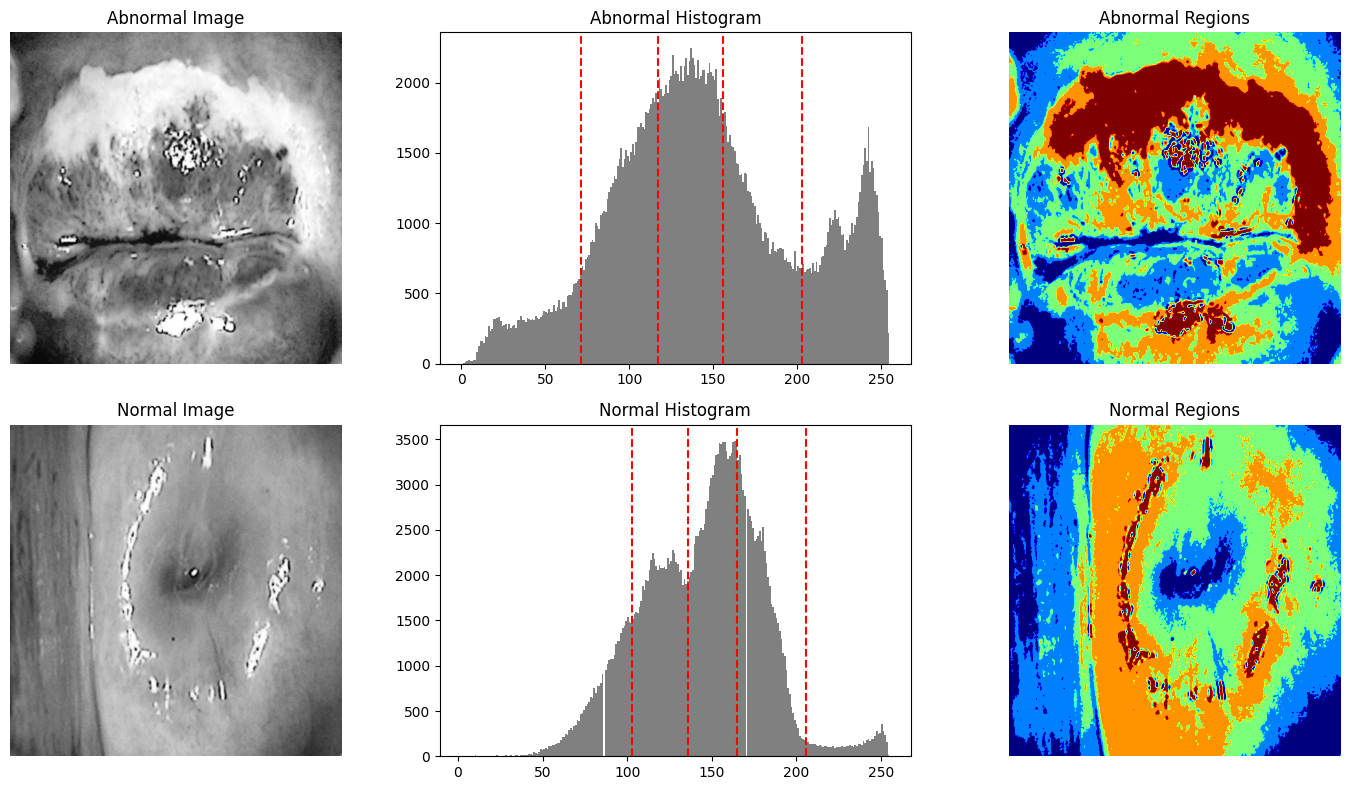

In [19]:
abnormal_thresholds = threshold_multiotsu(abnormal_image_gray, classes=5)
abnormal_regions = np.digitize(abnormal_image_gray, bins=abnormal_thresholds)

normal_thresholds = threshold_multiotsu(normal_image_gray, classes=5)
normal_regions = np.digitize(normal_image_gray, bins=normal_thresholds)

fig, ax = plt.subplots(2, 3, figsize=(15, 8))

ax[0, 0].imshow(abnormal_image_gray, cmap='gray')
ax[0, 0].set_title('Abnormal Image')
ax[0, 0].axis('off')

ax[0, 1].hist(abnormal_image_gray.ravel(), bins=256, color='gray')
for thr in abnormal_thresholds:
    ax[0, 1].axvline(thr, color='red', linestyle='--')
ax[0, 1].set_title('Abnormal Histogram')

ax[0, 2].imshow(abnormal_regions, cmap='jet')
ax[0, 2].set_title('Abnormal Regions')
ax[0, 2].axis('off')

ax[1, 0].imshow(normal_image_gray, cmap='gray')
ax[1, 0].set_title('Normal Image')
ax[1, 0].axis('off')

ax[1, 1].hist(normal_image_gray.ravel(), bins=256, color='gray')
for thr in normal_thresholds:
    ax[1, 1].axvline(thr, color='red', linestyle='--')
ax[1, 1].set_title('Normal Histogram')

ax[1, 2].imshow(normal_regions, cmap='jet')
ax[1, 2].set_title('Normal Regions')
ax[1, 2].axis('off')

plt.tight_layout()
plt.show()


# Convert Regions to Binary Mask

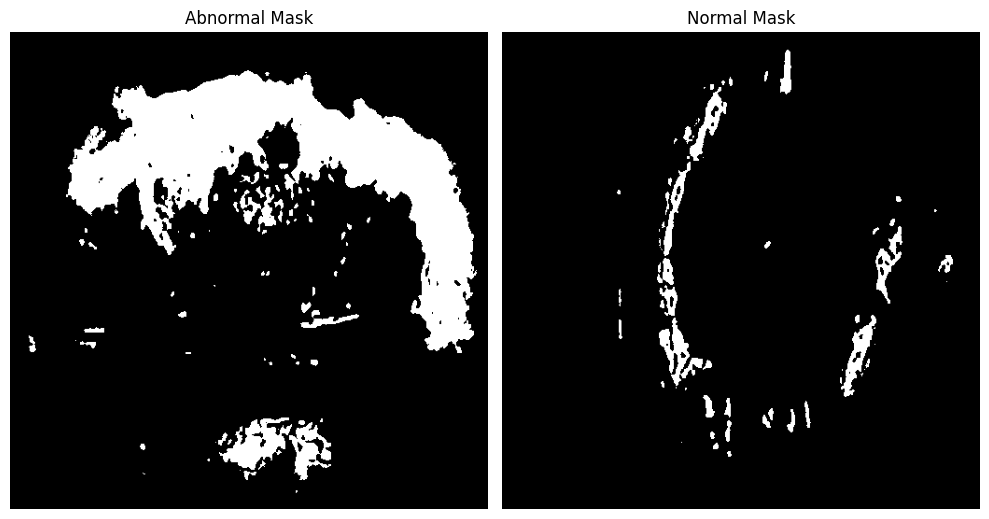

In [20]:
def toBinaryMask(regions):
    output = (regions * (255 // (regions.max() + 1))).astype(np.uint8)
    output[output < np.unique(output)[-1]] = 0
    output[output >= np.unique(output)[-1]] = 1
    return output

abnormal_mask = toBinaryMask(abnormal_regions)
normal_mask = toBinaryMask(normal_regions)

fig, ax = plt.subplots(1, 2, figsize=(10, 6))

ax[0].imshow(abnormal_mask, cmap='gray')
ax[0].set_title('Abnormal Mask')
ax[0].axis('off')

ax[1].imshow(normal_mask, cmap='gray')
ax[1].set_title('Normal Mask')
ax[1].axis('off')

plt.tight_layout()
plt.show()

# Bitwise Operation - Get Segmented Image

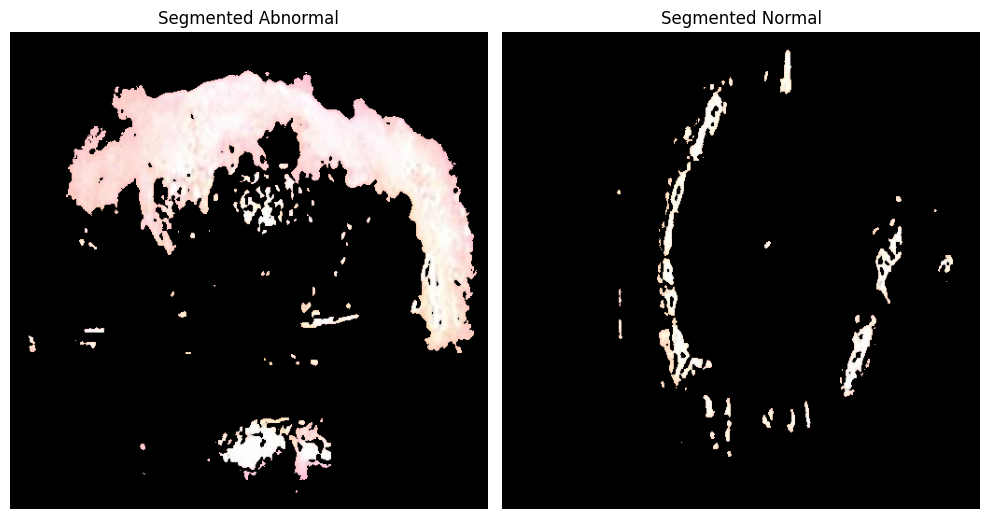

In [21]:
abnormal_mask_3ch = np.stack([abnormal_mask]*3, axis=-1)
normal_mask_3ch = np.stack([normal_mask]*3, axis=-1)

segmented_abnormal = abnormal_image * abnormal_mask_3ch
segmented_normal = normal_image * normal_mask_3ch

fig, ax = plt.subplots(1, 2, figsize=(10, 6))

ax[0].imshow(segmented_abnormal.astype(np.uint8))
ax[0].set_title('Segmented Abnormal')
ax[0].axis('off')

ax[1].imshow(segmented_normal.astype(np.uint8))
ax[1].set_title('Segmented Normal')
ax[1].axis('off')

plt.tight_layout()
plt.show()